In [1]:
import pandas as pd
import oplrareg

from plotnine import *

/home/jonathan/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. OPLRAreg for QSAR

OPLRAreg stands for **O**ptimal **P**iecewise **L**inear **R**egression **A**lgorithm with **Reg**ularisation.

It is an algorithm based on integer optimisation that identifies a partition feature $f^*$ amongst all features in a data set, $\mathbf{f}$, to partition the data into a certain number of regions. The outcome variable of each region is predicted by an independent linear equation.

`OPLRAreg` can be applied to any regression problem but the main objective of this research project was to develop regression algorithms for QSAR modelling. So the sections below showcase the use of `OPLRAreg` for modelling a data set of inhibitors for the Muscarinic Acetylcholine receptor M3 ([CHRM3](https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL245)). 


# 2. Data Input

We have stored our QSAR data sets, with the molecular descriptors already computed and normalised, in spreadsheets:

In [2]:
chrm3 = pd.read_excel("../qsar/data/CHRM3.xlsx", sheet_name="normalised_features")

#Molecular Descriptors
data = chrm3.iloc[:,:-1]

#pIC50 -- the outcome variable
target = chrm3.iloc[:, -1]

data.head()

,BCUTw.1l,BCUTw.1h,BCUTc.1l,BCUTc.1h,BCUTp.1l,BCUTp.1h,XLogP,LipinskiFailures,nRotB,MLogP,...,ATSc2,ATSc3,ATSc4,ATSc5,tpsaEfficiency.1,TopoPSA.1,nHBDon,nHBAcc,bpol,topoShape.1
0,0.965261,0.185698,0.808870,0.216376,0.958955,1.000000,0.549324,0.25,0.129032,0.272727,...,0.944175,0.506263,0.364291,0.461995,0.120790,0.043280,0.000000,0.035714,0.037336,0.000401
1,0.517799,0.185698,0.622474,0.408470,0.620993,0.372255,0.458677,0.25,0.161290,0.196970,...,0.928098,0.419420,0.278105,0.462516,0.279804,0.112473,0.333333,0.107143,0.068551,0.000401
2,0.517799,0.185698,0.621402,0.408270,0.622116,0.374085,0.485648,0.25,0.193548,0.227273,...,0.929607,0.490488,0.285431,0.479625,0.283028,0.112473,0.333333,0.107143,0.079811,0.000401
3,0.517799,0.185698,0.636104,0.408275,0.548497,0.369623,0.426097,0.00,0.161290,0.181818,...,0.921627,0.409878,0.303301,0.516744,0.291487,0.112473,0.333333,0.107143,0.056695,0.000401
4,0.679612,0.185698,0.619878,0.402434,0.616658,0.369828,0.414220,0.00,0.161290,0.196970,...,0.924157,0.484237,0.407883,0.384908,0.307870,0.112473,0.333333,0.107143,0.056100,0.000401


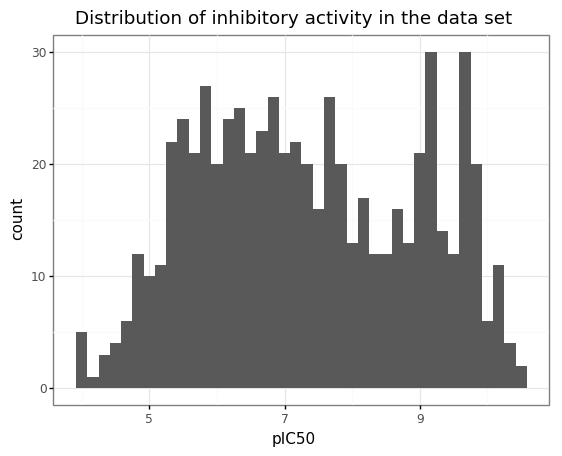

<ggplot: (8729251758961)>

In [16]:
ggplot(pd.DataFrame(target), aes(x='target')) + \
    geom_histogram(bins=40) + theme_bw() +\
    xlab("pIC50") + ggtitle("Distribution of inhibitory activity in the data set")

# 3. Train Piecewise Regression Algorithm

Training this algorithm is simple, OPLRAreg follows the same conventions as `scikit-learn`.

Simply pass the data (features) and the outcome to the function `OplraRegularised.fit` and set the parameters as you wish.

## 3.1 How the algorithm works

The steps involved in the algorithm are the following:

1. First the algorithm selects the most relevant features. This is controlled by the parameter $\lambda$ (`lam`), a large $\lambda$ will reduce the number of features and the algorithm will run faster.
2. Next, the algorithm iterates over the selected features to identify which feature $f^*$ best divides the data into two disjoint regions. 
3. The algorithm will keep identifying more breakpoints for $f^*$, increasing the number of regions until the error between the predicted and the actual outcome variable is no longer reduced

Just as a small example, let us run the algorithm for a large lambda $\lambda = 0.02$:

In [24]:
oplra_obj = oplrareg.OplraRegularised(beta=0.03, lam=0.02, solver_name='glpk')
oplra_obj.fit(data, target, verbose=True)

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.02,
         solver_name='glpk')
########## R = 1
SELECTED FEATURES:
['nBase', 'nSmallRings', 'nRingBlocks', 'MDEO.12', 'khs.ssCH2', 'khs.aasC', 'khs.sssN', 'khs.aaS', 'FMF', 'VCH.5', 'VCH.6', 'C1SP2', 'C3SP2', 'ATSc4', 'ATSc5']

None

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.02,
         solver_name='glpk')
########## R = 2 f* = nBase (loop 1/15) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.02,
         solver_name='glpk')
########## R = 2 f* = nSmallRings (loop 2/15) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.02,
         solver_name='glpk')
########## R = 2 f* = nRingBlocks (loop 3/15) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.02,
         solver_name='glpk')
########## R = 2 f* = MDEO.12 (loop 4/15) ###########

OplraRegularised(beta=0.03, eps

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.02,
         solver_name='glpk')

# 4 Interpreting the results

The Mean Absolute Error of the model created was:

In [40]:
oplra_obj.final_model.mae.value

0.799299505501333

So, on average, the predictions are wrong by about $~ 0.8$ log units.

## 4.1 Breakpoints and regions

The algorithm has identified two regions for this data set, separated by the breakpoint below:

In [28]:
oplra_obj.get_model_info()[1]

,breakpoints,fStar
0,0.149347,MDEO.12


This means that all samples with MDEO.12 < 0.1493 will be assigned to a region (`r0`) while the others will be assigned to `r1`:

In [33]:
chrm3['region'] = chrm3['MDEO.12'].apply(lambda x: 'r0' if x <= 0.149347 else 'r1')

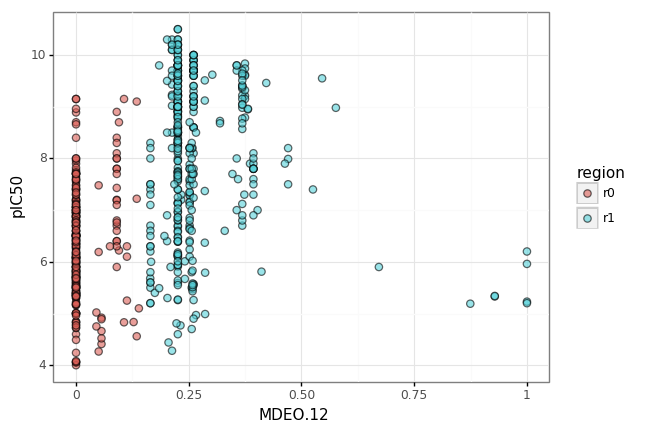

<ggplot: (8729255918235)>

In [35]:
ggplot(chrm3, aes(x='MDEO.12', y='pIC50', fill='region')) +\
    geom_point(size=2.5, alpha=0.6)+ theme_bw()

## 4.2 Linear equations per region

The linear equations per each region can be obtained by `get_model_info`:

In [36]:
oplra_obj.get_model_info()[0]

,region,nBase,nRingBlocks,khs.aasC,khs.sssN,khs.aaS,FMF,VCH.6,C3SP2,ATSc4,B
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,6.300000
1,1,1.580394,0.872107,-1.003422,-1.085396,0.484951,1.1159,0.314677,-1.439786,0.991323,6.326584


Because we use a large regularisation ($\lambda = 0.02$), only 9 features were selected, out of 94. B is the intercept of the regression.

Region `r0` is simply predicted by the formula: $pIC50 = 6.3$ (the average of the points) while region `r1` is predicted by a combination of all 9 selected features.